In [1]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

In [2]:
X,Y=make_circles(n_samples=500,noise=0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


<IPython.core.display.Javascript object>


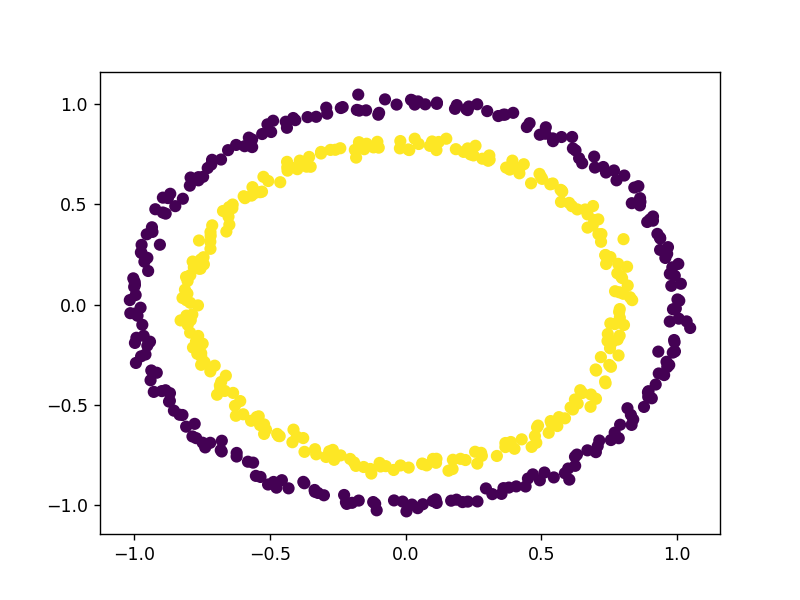

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [5]:
# This is not linearly seperable dataset

In [6]:
def phi(X):
    x1=X[:,0]
    x2=X[:,1]
    x3=x1**2+x2**2
    
    X_=np.zeros((X.shape[0],3))
    X_[:,:-1]=X
    X_[:,-1]=x3
    
    return X_

In [7]:
X_=phi(X)

In [8]:
def plot3d(X,show=True):
    fig=plt.figure(figsize=(10,6))
    ax=fig.gca(projection='3d')
    x1=X[:,0]
    x2=X[:,1]
    x3=X[:,2]
    ax.scatter(x1,x2,x3,c=Y)
    if show==True:
        plt.show()
    return ax

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [10]:
lr=LogisticRegression()

In [11]:
acc=cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 43.2000


In [12]:
acc=cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


In [13]:
lr.fit(X_,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
wts=lr.coef_

In [15]:
bias=lr.intercept_

In [16]:
XX,YY=np.meshgrid(range(-2,2),range(-2,2))

In [17]:
print(XX.shape)

(4, 4)


In [18]:
z=-(wts[0,0]*XX+wts[0,1]*YY+bias)/wts[0,2]

<IPython.core.display.Javascript object>


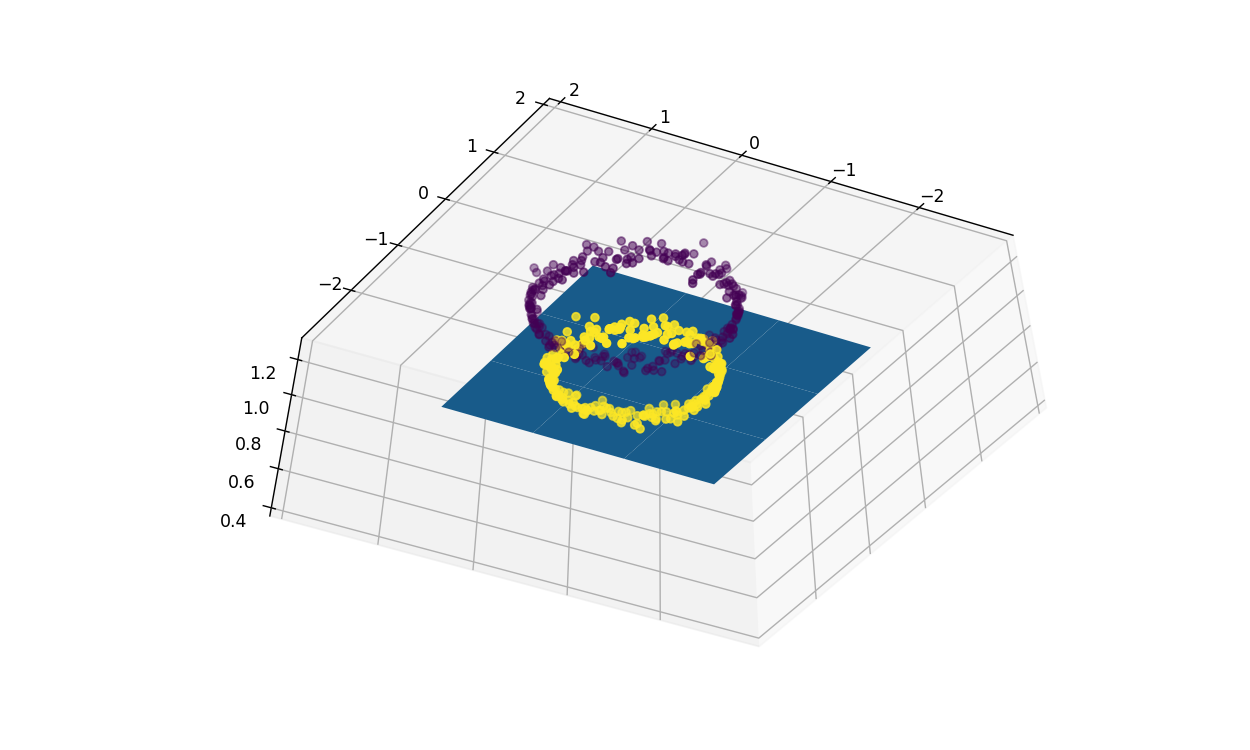

In [19]:
ax=plot3d(X_,False)
ax.plot_surface(XX,YY,z)
plt.show()